UNIVARIATE ANALYSIS SUMMARY

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/default of credit card clients.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


Here is a summary of the dataset:

Total Records: 30,000 clients.
Key Features:
LIMIT_BAL: Credit limit, ranging from 10,000 to 1,000,000.
SEX: Gender (1 = male, 2 = female).
EDUCATION: Education level, with some anomalies (values 0 and 6).
MARRIAGE: Marital status, with some anomalies (value 0).
AGE: Client age, ranging from 21 to 79.
PAY_0 to PAY_6: Payment status history, ranging from -2 (no consumption) to 8 (delay more than 8 months).
BILL_AMT1 to BILL_AMT6: Bill statement amounts.
PAY_AMT1 to PAY_AMT6: Payment amounts.
default_payment_next_month: Target variable (1 = default, 0 = no default).

In [ ]:
print(data.columns)


Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')


In [ ]:
data = pd.read_csv(file_path, header=1)  # Use header=1 to set the correct row as the header
# Now you can check the first few rows to confirm everything is correct
print(data.head())



   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [ ]:
data.rename(columns={'default payment next month': 'default_payment_next_month'}, inplace=True)


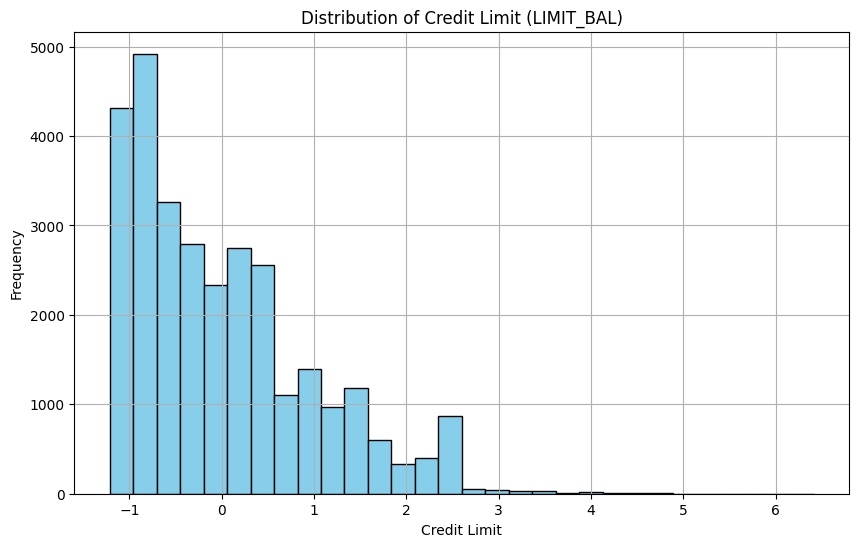

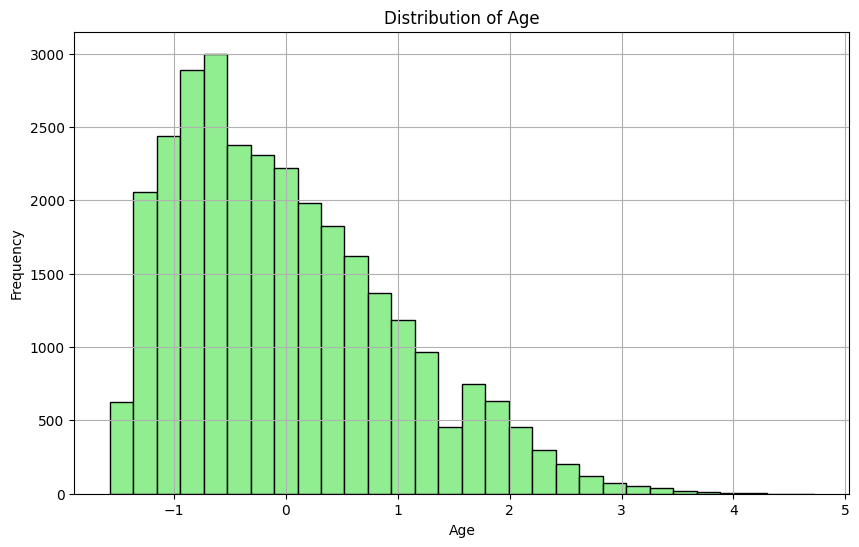

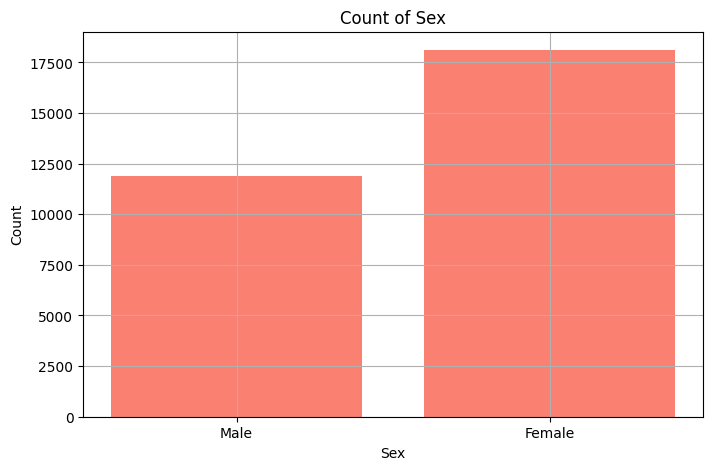

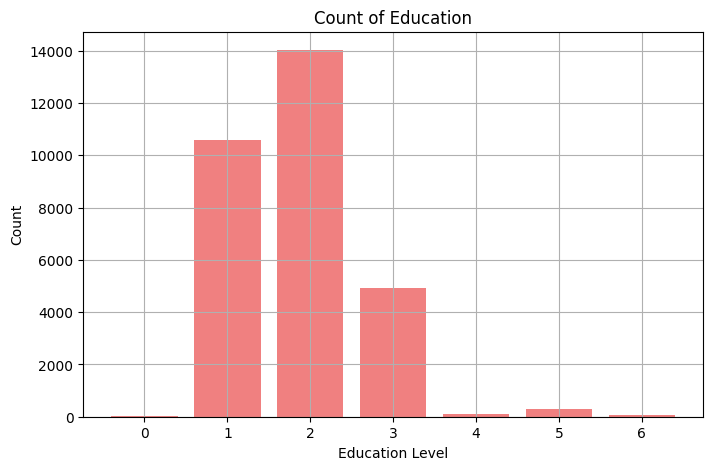

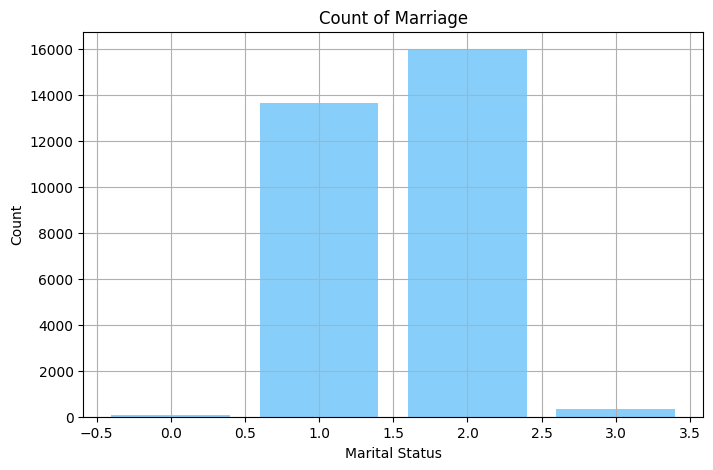

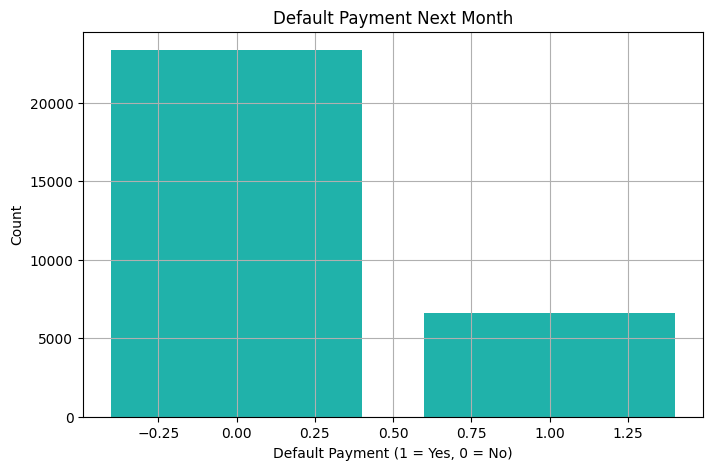

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of LIMIT_BAL (Credit Limit)
plt.figure(figsize=(10, 6))
plt.hist(data['LIMIT_BAL'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Credit Limit (LIMIT_BAL)')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the distribution of AGE
plt.figure(figsize=(10, 6))
plt.hist(data['AGE'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the count of SEX
plt.figure(figsize=(8, 5))
plt.bar(data['SEX'].value_counts().index, data['SEX'].value_counts().values, color='salmon')
plt.title('Count of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([1, 2], ['Male', 'Female'])
plt.grid(True)
plt.show()

# Plotting the count of EDUCATION
plt.figure(figsize=(8, 5))
plt.bar(data['EDUCATION'].value_counts().index, data['EDUCATION'].value_counts().values, color='lightcoral')
plt.title('Count of Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Plotting the count of MARRIAGE
plt.figure(figsize=(8, 5))
plt.bar(data['MARRIAGE'].value_counts().index, data['MARRIAGE'].value_counts().values, color='lightskyblue')
plt.title('Count of Marriage')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Plotting the count of the target variable (Default Payment Next Month)
plt.figure(figsize=(8, 5))


plt.bar(data['default_payment_next_month'].value_counts().index, data['default_payment_next_month'].value_counts().values, color='lightseagreen')
plt.title('Default Payment Next Month')
plt.xlabel('Default Payment (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [ ]:
# Dropping the first row which contains the header information and resetting the index
data = data.drop(0).reset_index(drop=True)

# Convert columns to appropriate data types
data = data.apply(pd.to_numeric, errors='ignore')

# Summary statistics
summary_stats = data.describe()

# Display statistics
summary_stats


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000,...,29998.000000,29998.000000,29998.000000,29998.000000,2.999800e+04,29998.000000,29998.000000,29998.000000,29998.000000,29998.000000
mean,15001.500000,167490.822055,1.603707,1.853124,1.551870,35.486199,-0.016734,-0.133909,-0.166178,-0.220648,...,43265.724282,40313.973398,38874.243316,5663.958097,5.921502e+03,5225.996566,4826.365291,4799.707614,5215.783619,0.221148
std,8659.821024,129748.902717,0.489135,0.790374,0.521971,9.217810,1.123764,1.197099,1.196897,1.169168,...,64334.101396,60798.364539,59555.314967,16563.767948,2.304160e+04,17607.505660,15666.641635,15278.764737,17778.023207,0.415027
min,3.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7502.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1763.250000,1256.000000,1000.000000,8.330000e+02,390.000000,296.000000,254.250000,118.000000,0.000000
50%,15001.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18105.500000,17075.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54512.000000,50201.500000,49202.750000,5006.000000,5.000000e+03,4505.000000,4013.750000,4032.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


MULTIVARIATE ANALYSIS

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Correlation matrix
corr_matrix = data.corr()

# Set up the figure for the heatmap
plt.figure(figsize=(15, 10))

# Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title('Correlation Matrix Heatmap')
plt.show()


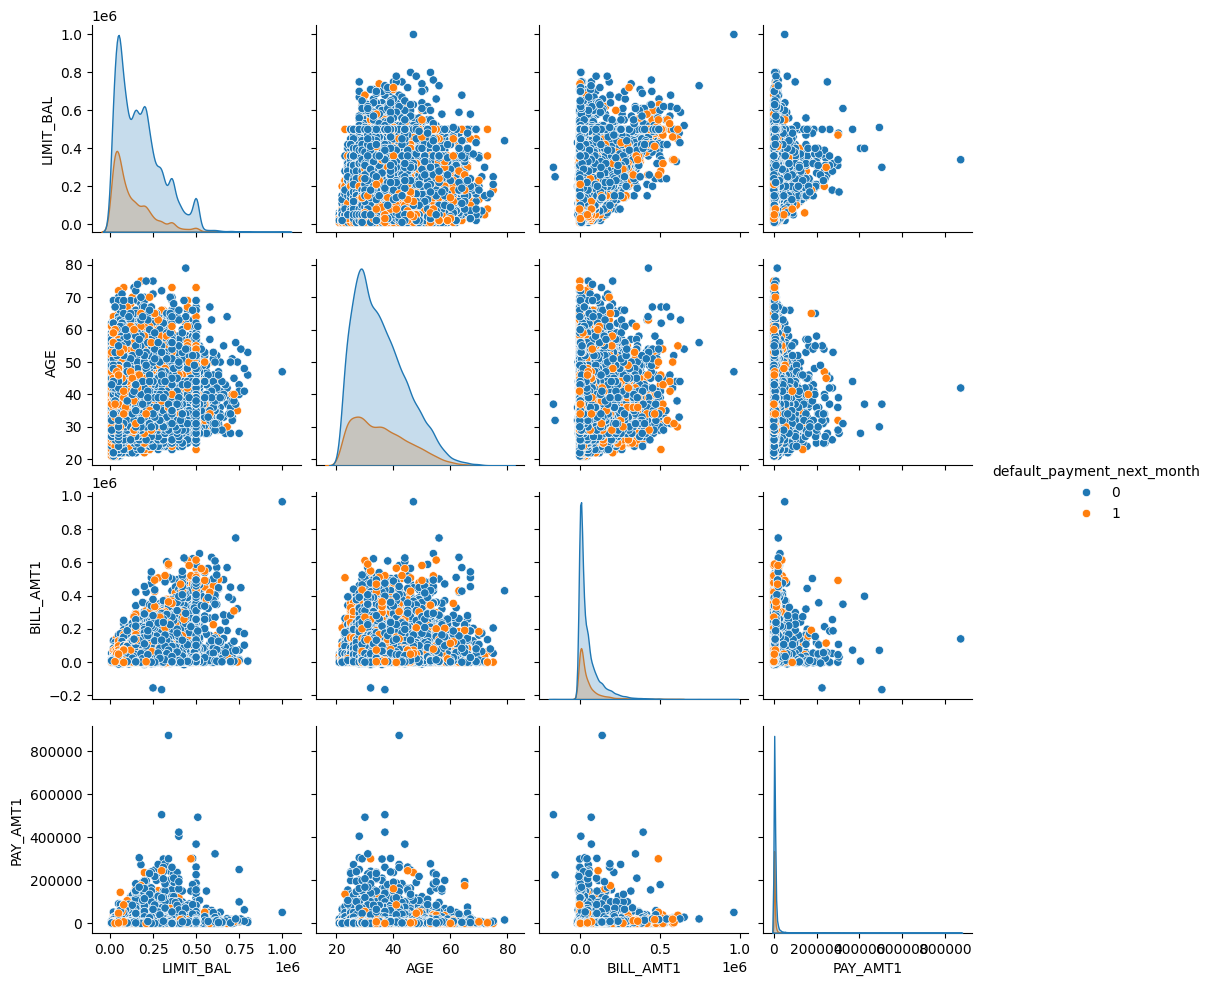

In [ ]:
sns.pairplot(data[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1', 'default_payment_next_month']], hue='default_payment_next_month')
plt.show()


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Option 1: Fill missing values (if any) with mean/median/mode
#data.fillna(data.mean(), inplace=True)

# Option 2: Drop rows/columns with missing values (if any)
#data.dropna(inplace=True)

print(missing_values)


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64


In [ ]:
# # Example: Removing outliers in LIMIT_BAL using IQR method
# Q1 = data['LIMIT_BAL'].quantile(0.25)
# Q3 = data['LIMIT_BAL'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter out outliers
# data = data[(data['LIMIT_BAL'] >= lower_bound) & (data['LIMIT_BAL'] <= upper_bound)]


In [ ]:
# Example: Correcting EDUCATION values
#data['EDUCATION'] = data['EDUCATION'].replace([0, 6], 4)  # Assuming 4 = others

# Example: Correcting MARRIAGE values
#data['MARRIAGE'] = data['MARRIAGE'].replace(0, 3)  # Assuming 3 = others
# Example: One-Hot Encoding
# data = pd.get_dummies(data, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)
# Example: Creating new features
data['TOTAL_BILL_AMT'] = data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
data['TOTAL_PAY_AMT'] = data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing numerical features
scaler = StandardScaler()
numerical_features = ['LIMIT_BAL', 'AGE', 'TOTAL_BILL_AMT', 'TOTAL_PAY_AMT']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separating features and target variable
X = data.drop('default_payment_next_month', axis=1)
y = data['default_payment_next_month']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shape of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[:5])

Training data shape: (23864, 30)
Test data shape: (5967, 30)
[[-0.3722824  -1.15656288 -0.26664348  0.01588136  0.11163217  0.13708126
   0.18519988  0.23056388  0.24443908 -0.64886973 -0.62308217 -0.59048492
  -0.57507382 -0.55403936 -0.53486487 -0.2475756  -0.19745495 -0.27647965
  -0.2864632  -0.28107932 -0.23880279 -0.62192294 -0.43196403 -1.24154221
   1.06326105 -0.44266318 -0.08032871 -0.09712242 -1.06720487 -0.11321329]
 [-0.6296739   0.28361874 -0.15794364 -0.87796969 -0.72689163 -0.6997842
  -0.66866603 -0.64964351  0.24443908 -0.70420748 -0.68171131 -0.68887833
  -0.66784079 -0.64007349 -0.60548007 -0.24607517 -0.25403997 -0.24203637
  -0.17460052 -0.18006269 -0.28781933 -0.70234639 -0.4042232  -1.24154221
   1.06326105 -0.44266318 -0.08032871 -0.09712242 -1.06720487 -0.11321329]
 [ 0.0570111   0.12359856  0.05945604  0.90973242 -1.56541543 -1.53664966
  -1.52253195 -1.52985089 -1.48471291 -0.70658429 -0.70366457 -0.68865519
  -0.68498949 -0.67713016 -0.66395964 -0.33760165 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initializing and training the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.8159879336349924
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4642
           1       0.65      0.37      0.47      1325

    accuracy                           0.82      5967
   macro avg       0.75      0.65      0.68      5967
weighted avg       0.80      0.82      0.80      5967



In [ ]:
import xgboost as xgb

# Initializing and training the model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating the model
print("XGBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Classifier Accuracy: 0.8141444612032848
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4642
           1       0.64      0.37      0.47      1325

    accuracy                           0.81      5967
   macro avg       0.74      0.66      0.68      5967
weighted avg       0.80      0.81      0.79      5967



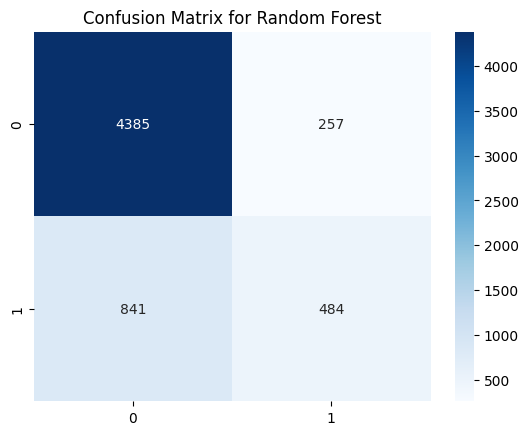

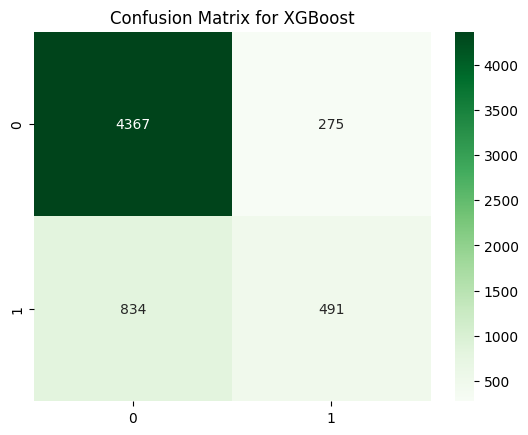

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix for XGBoost")
plt.show()


In [ ]:
# Predictions on the training set
y_train_pred_rf = rf_model.predict(X_train)
y_train_pred_xgb = xgb_model.predict(X_train)


In [ ]:
# Evaluate Random Forest on training set
print("Random Forest Classifier - Training Set Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print(classification_report(y_train, y_train_pred_rf))

# Evaluate XGBoost on training set
print("XGBoost Classifier - Training Set Accuracy:", accuracy_score(y_train, y_train_pred_xgb))
print(classification_report(y_train, y_train_pred_xgb))


Random Forest Classifier - Training Set Accuracy: 0.9999580958766343
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18574
           1       1.00      1.00      1.00      5290

    accuracy                           1.00     23864
   macro avg       1.00      1.00      1.00     23864
weighted avg       1.00      1.00      1.00     23864

XGBoost Classifier - Training Set Accuracy: 0.8975444183707677
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     18574
           1       0.91      0.60      0.72      5290

    accuracy                           0.90     23864
   macro avg       0.90      0.79      0.83     23864
weighted avg       0.90      0.90      0.89     23864



Logistic Regression Classifier Accuracy: 0.811630635160047
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4642
           1       0.72      0.25      0.37      1325

    accuracy                           0.81      5967
   macro avg       0.77      0.61      0.63      5967
weighted avg       0.80      0.81      0.77      5967



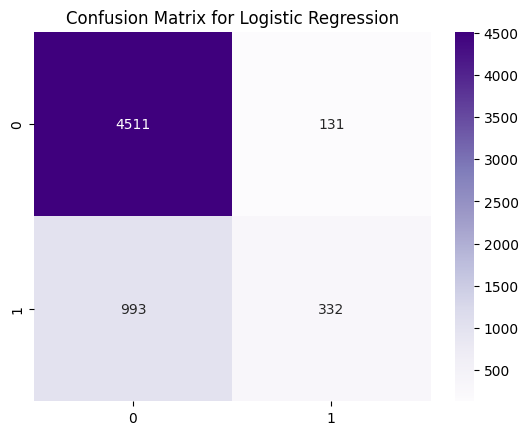

In [ ]:
from sklearn.linear_model import LogisticRegression
# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Predictions using the Logistic Regression model
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Classifier Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


In [ ]:

# Accuracy of each model
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [0.8116, 0.9999, 0.8975]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Comparison: Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Setting y-axis limits to focus on high accuracy
plt.show()

Which Model Performs Better?

XGBoost seems to offer the best trade-off between accuracy and
generalization, with a good performance on the training set and a reasonable balance of precision and recall for both classes.

Random Forest might be overfitting since its training accuracy is almost perfect. This can be tuned further or cross-validated, but in its current state, it might not perform as well on unseen data.

Logistic Regression is the simplest model, and while it performs decently, its low recall for the default class (1) suggests it might not be the best choice if catching defaults is critical.



NOTE: If we are looking for a well-rounded model, XGBoost is likely the best option. However,we can further tuning of Random Forest could lead to strong results.


Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search with cross-validation
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

#parameters and score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy RF:", grid_search_rf.best_score_)

# Train with parameters
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy RF: 0.819267388209278


RandomForestClassifier(max_depth=10)

In [ ]:
from xgboost import XGBClassifier

# Define parameter grid for tuning
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'scale_pos_weight': [1, 2, 3]  # Adjust based on the class imbalance
}

# Perform Grid Search with cross-validation
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Cross-Validation Accuracy for XGBoost:", grid_search_xgb.best_score_)

# Train with the best parameters
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_model.fit(X_train, y_train)


In [ ]:
# Predictions on the test set
y_test_pred_best_rf = best_rf_model.predict(X_test)
y_test_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the tuned Random Forest model on test set
print("Tuned Random Forest Classifier Accuracy:", accuracy_score(y_test, y_test_pred_best_rf))
print(classification_report(y_test, y_test_pred_best_rf))

# Evaluate the tuned XGBoost model on test set
print("Tuned XGBoost Classifier Accuracy:", accuracy_score(y_test, y_test_pred_best_xgb))
print(classification_report(y_test, y_test_pred_best_xgb))
